## Multiple Linear Regression

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df=pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [40]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [41]:
# drop the year month and day
df.drop(["Unnamed: 0","year","month"],axis=1,inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


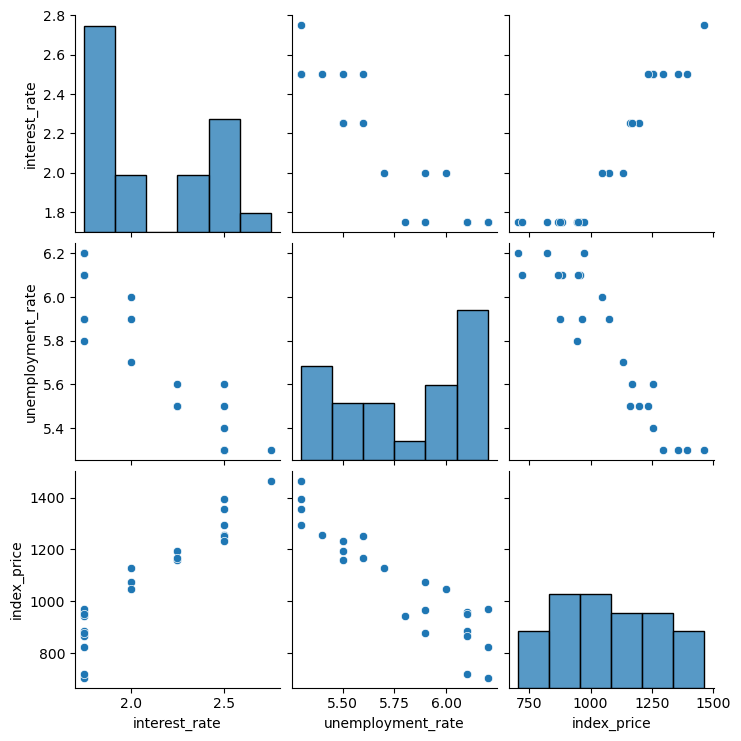

In [42]:
sns.pairplot(df)
plt.show()

In [43]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


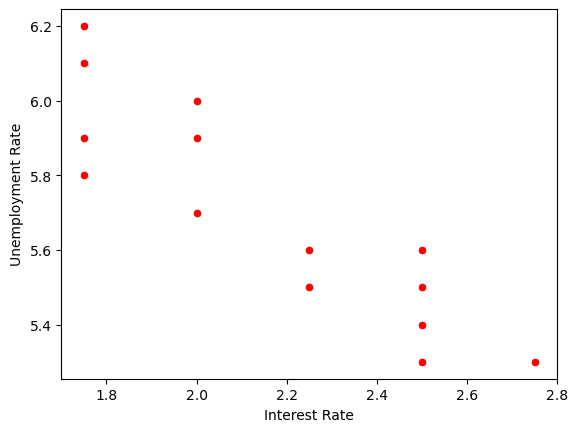

In [44]:
# Visulize the datapoint more closly
sns.scatterplot(data=df,x=df["interest_rate"],y=df["unemployment_rate"],color="red")
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")
plt.show()

In [45]:
#  Independent and dependent feature:
x=df[["interest_rate","unemployment_rate"]]
print(x.shape)
y=df["index_price"]
print(y.shape)

(24, 2)
(24,)


In [46]:
print(x.head())
print(y.head())

   interest_rate  unemployment_rate
0           2.75                5.3
1           2.50                5.3
2           2.50                5.3
3           2.50                5.3
4           2.50                5.4
0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64


In [47]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

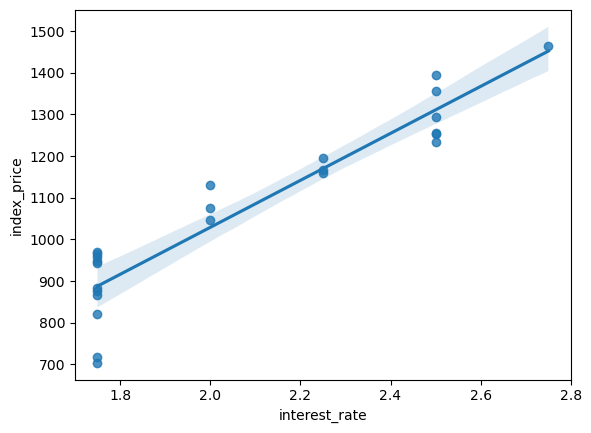

In [48]:
sns.regplot(data=df,x=df["interest_rate"],y=df["index_price"])
plt.show()

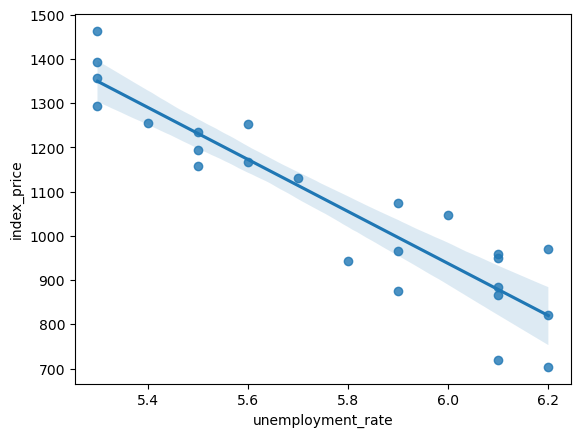

In [49]:
sns.regplot(data=df,x=df["unemployment_rate"],y=df["index_price"])
plt.show()

In [50]:
#  Standerd the data unit in same unit
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [51]:
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.fit_transform(x_test)


In [52]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [53]:
# Train the model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [54]:
regression.fit(x_train,y_train)

LinearRegression()

In [55]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(regression, x_train, y_train,
                         scoring='neg_mean_squared_error', cv=3)
np.mean(scores)


np.float64(-5914.828180162396)

In [56]:
# Prediction
y_pred= regression.predict(x_test)

In [57]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [ ]:
#  Performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mas=mean_absolute_error(y_test,y_pred)
print("Mean sqaure error:",mse)
print("Mean Absoult error:",mas)
rmse=np.sqrt(mse)
print("Root mean sqaure error:",rmse)

Mean sqaure error: 8108.567426306611
Mean Absoult error: 73.80444932337099
Root mean sqaure error: 90.04758423359624


In [60]:
#  Calculate the r square
from sklearn.metrics import r2_score
Score=r2_score(y_test,y_pred)
print(" r Sqaure:",Score)

#  display the Adjusted R-squared matrix:
print("Adjusted r square",1-(1-Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

 r Sqaure: 0.7591371539010254
Adjusted r square 0.5985619231683756


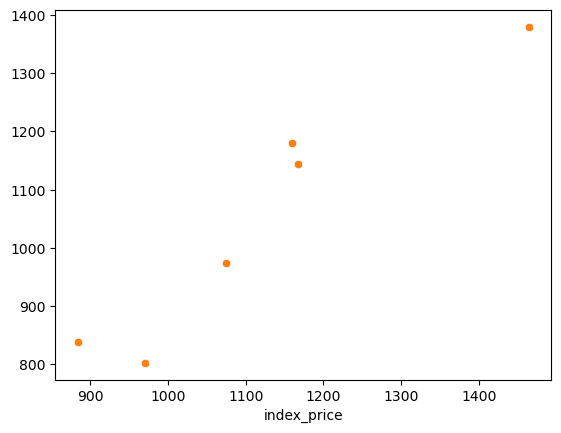

In [63]:
#  Assumption
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

In [64]:
residuals=y_test-y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

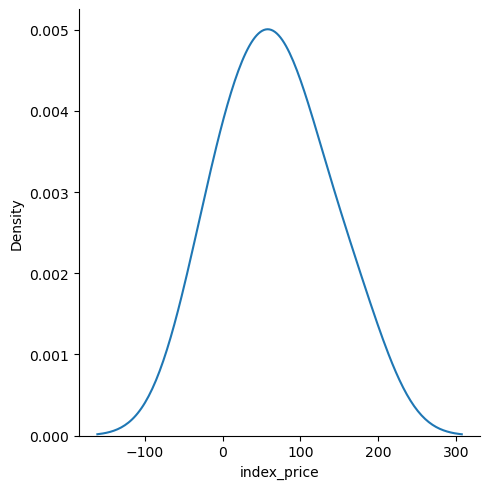

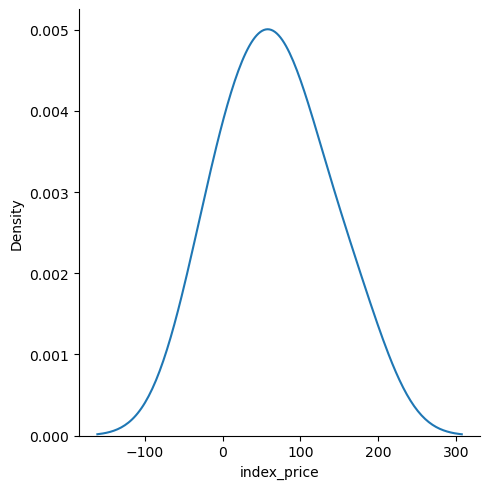

In [69]:
#  plot the residuals
sns.displot(residuals,kind="kde")
plt.show()

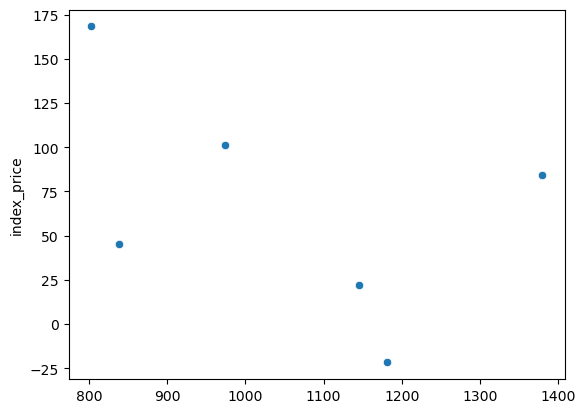

In [70]:
#  Create the scattor polt in b/w reseduals and prediction
sns.scatterplot(x=y_pred,y=residuals)
plt.show()

In [71]:
import statsmodels.api  as sm
model=sm.OLS(y_train,x_train).fit()

In [73]:
model.summary()

c:\Users\sriva\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 19 Oct 2025   Prob (F-statistic):                       0.754
Time:                        19:52:50   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
print(regression.coef_)

[  88.27275507 -116.25716066]
